<a href="https://colab.research.google.com/github/pawansaini02/EV-Market-India-Analysis-and-Future-Trends/blob/main/Ev_Market_India_Analysis_and_Future_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip -q "/content/archive (2).zip"


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet


/usr/local/lib/python3.10/dist-packages/holidays/deprecations/v1_incompatibility.py:40: FutureIncompatibilityWarning: 

This is a future version incompatibility warning from Holidays v0.60
to inform you about an upcoming change in our API versioning strategy that may affect your
project's dependencies. Starting from version 1.0 onwards, we will be following a loose form of
Semantic Versioning (SemVer, https://semver.org) to provide clearer communication regarding any
potential breaking changes.

This means that while we strive to maintain backward compatibility, there might be occasional
updates that introduce breaking changes to our API. To ensure the stability of your projects,
we highly recommend pinning the version of our API that you rely on. You can pin your current
holidays v0.x dependency (e.g., holidays==0.60) or limit it (e.g., holidays<1.0) in order to
avoid potentially unwanted upgrade to the version 1.0 when it's released (ETA 2025Q1-Q2).

If you have any questions or conc

In [20]:
# Load datasets
file_paths = {
    'ev_maker_place': '/content/EV Maker by Place.csv',
    'operational_pc': '/content/OperationalPC.csv',
    'vehicle_class': '/content/Vehicle Class - All.csv',
    'ev_cat': '/content/ev_cat_01-24.csv',
    'ev_sales': '/content/ev_sales_by_makers_and_cat_15-24.csv'

}

# Preview datasets
for df, name in zip([ev_maker_place, operational_pc, vehicle_class, ev_cat, ev_sales],
                    ['EV Maker by Place', 'Operational PC', 'Vehicle Class', 'EV Category', 'EV Sales']):
    print(f"\nPreview of {name}:\n", df.head())



Preview of EV Maker by Place:
             EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu

Preview of Operational PC:
                State  No. of Operational PCS
0  Andaman & Nicobar                       3
1     Andhra Pradesh                     327
2  Arunachal Pradesh                       9
3              Assam                      86
4              Bihar                     124

Preview of Vehicle Class:
                      Vehicle Class Total Registration
0  FOUR WHEELER (INVALID CARRIAGE)             21,346
1              HEAVY GOODS VEHICLE          58,70,865
2              HEAVY MOTOR VEHICLE           1,02,965
3          HEAVY PASSENGER VEHICLE           8,28,189
4              LIGHT GOODS VEHICLE        1,02,49,591

Preview of EV Category:
        Da

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Reading the data into pandas DataFrames
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


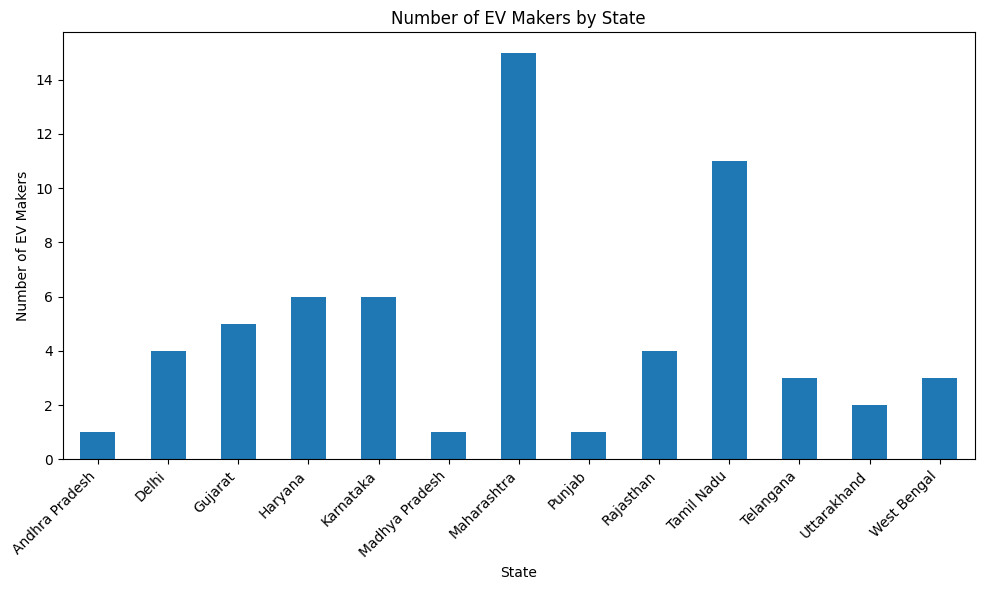

In [22]:
# Visualisations - Top EV Makers, Operational PCs, Registration and Sales Trends

import matplotlib.pyplot as plt

# Helper function to create bar plots
def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# EV Maker by Place
ev_maker_by_place = dataframes['ev_maker_place'].groupby('State').size()
create_bar_plot(ev_maker_by_place, 'Number of EV Makers by State', 'State', 'Number of EV Makers')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


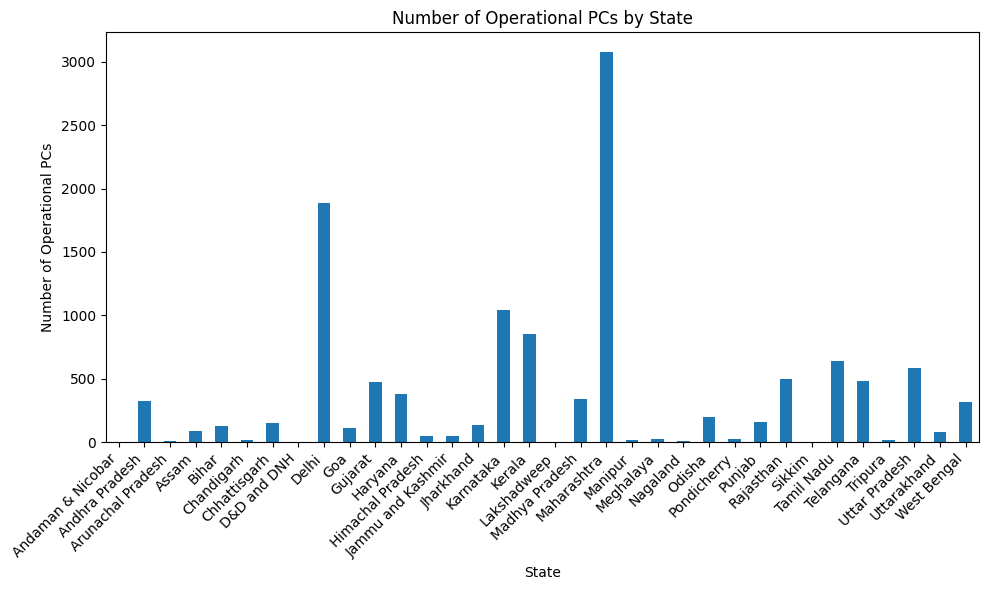

In [24]:
# OperationalPC
operational_pc = dataframes['operational_pc'].set_index('State')
create_bar_plot(operational_pc['No. of Operational PCS'], 'Number of Operational PCs by State', 'State', 'Number of Operational PCs')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


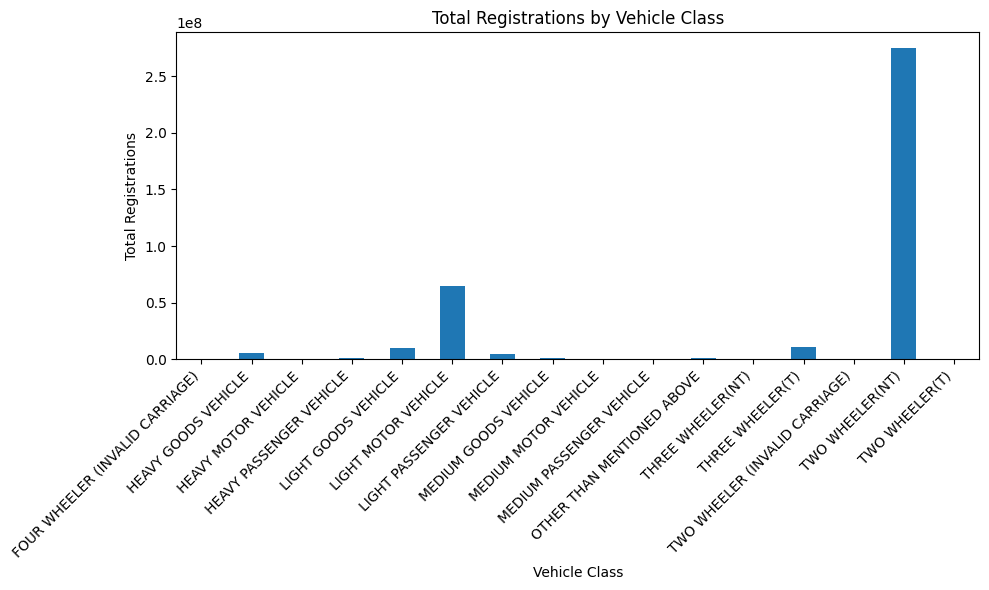

In [33]:
vehicle_class_all = dataframes['vehicle_class'].set_index('Vehicle Class')

# Clean the 'Total Registration' column by removing commas and converting to integers
vehicle_class_all['Total Registration'] = vehicle_class_all['Total Registration'].str.replace(',', '').astype(int)

# Now, let's recreate the bar plot for "Vehicle Class - All"
create_bar_plot(vehicle_class_all['Total Registration'], 'Total Registrations by Vehicle Class', 'Vehicle Class', 'Total Registrations')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


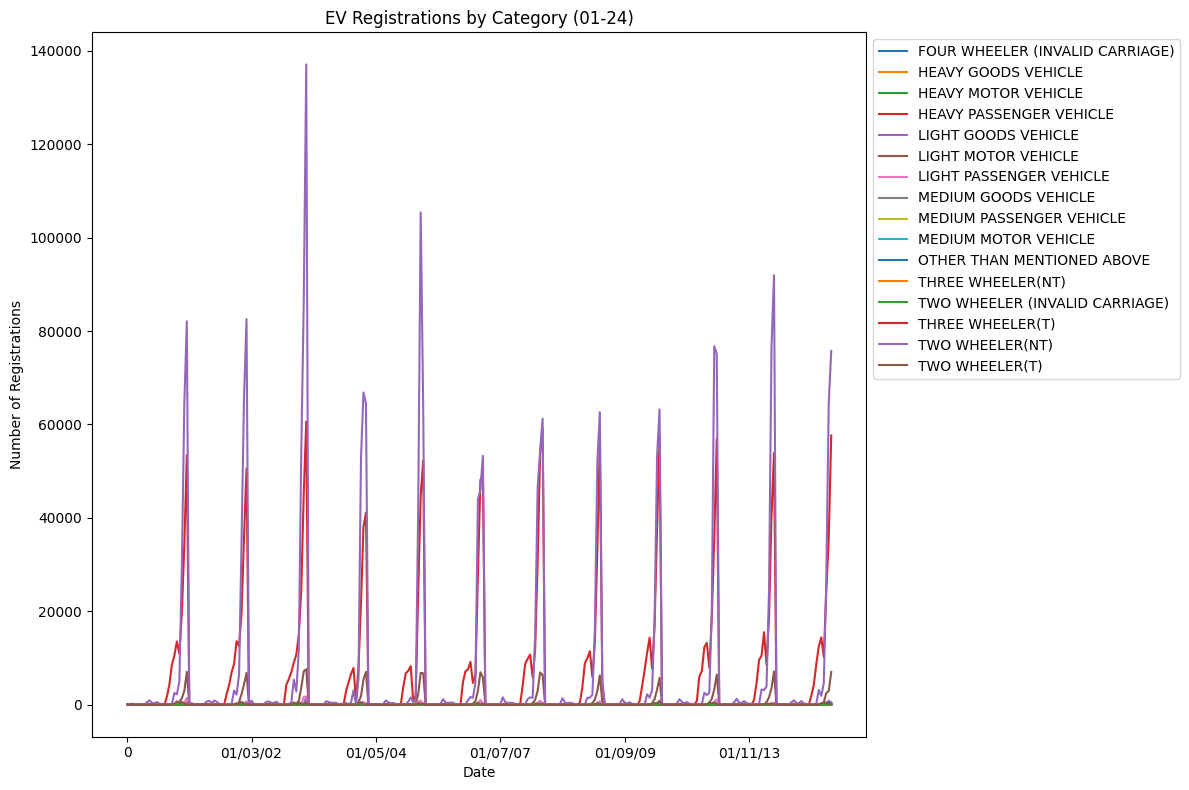

In [34]:
# EV Category 01-24 - Time Series Plot
ev_category = dataframes['ev_cat'].set_index('Date')
ev_category.plot(figsize=(12, 8))
plt.title('EV Registrations by Category (01-24)')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


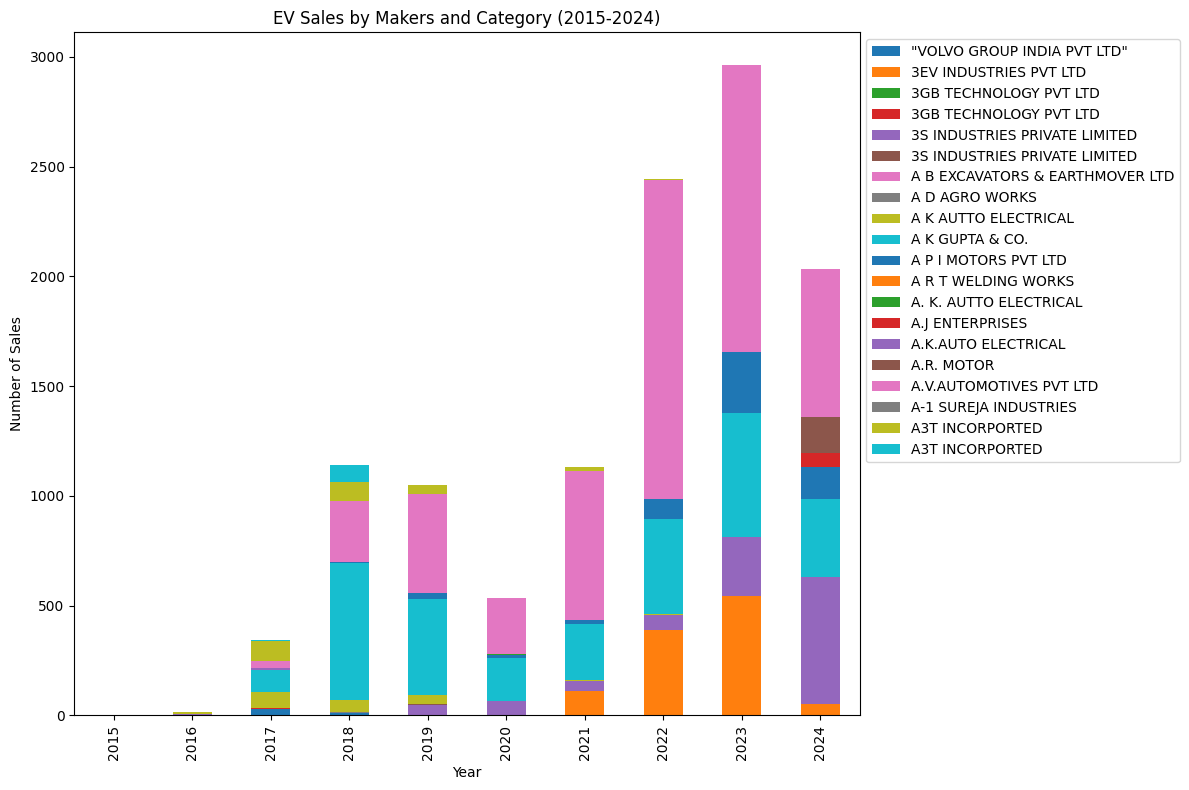

In [35]:
# EV Sales by Makers and Category 15-24 (plotting for top 20 given number of makers)
ev_sales = dataframes['ev_sales'].set_index('Maker')[:20]
ev_sales.drop(columns=['Cat'], inplace=True)
ev_sales.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('EV Sales by Makers and Category (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


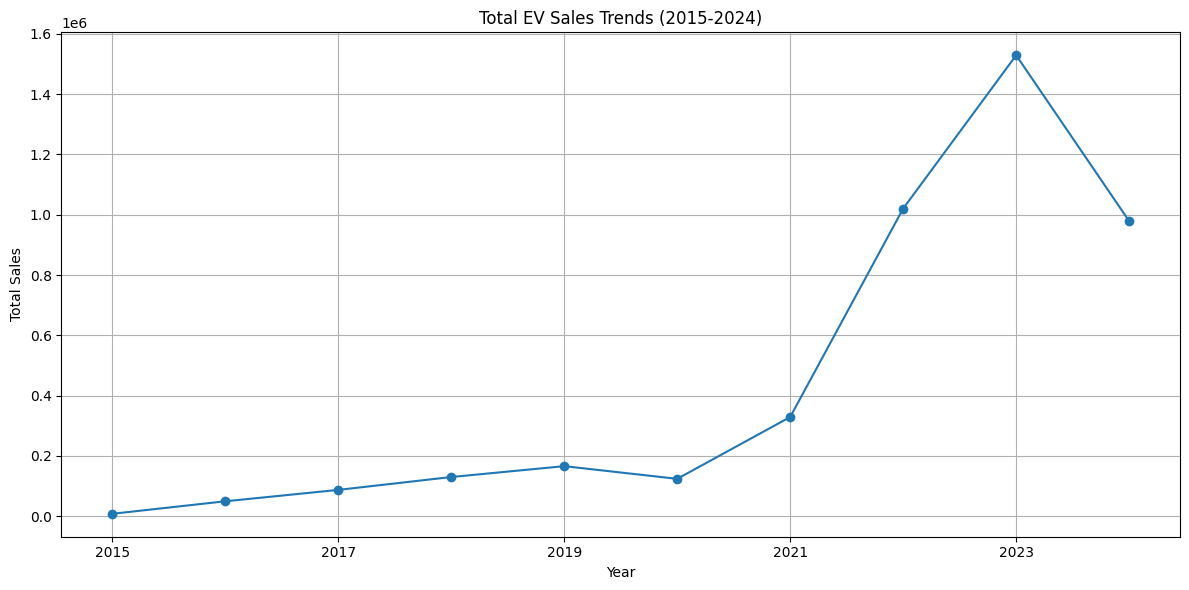

In [36]:
# EV Sales by Makers and Category (2015-2024) - Data Preparation
ev_sales = dataframes['ev_sales'].set_index('Maker')
ev_sales.drop(columns=['Cat'], inplace=True)

# Calculate the total sales per year
total_sales_by_year = ev_sales.sum()

# Plot the total EV sales trends over the years
plt.figure(figsize=(12, 6))
total_sales_by_year.plot(marker='o')
plt.title('Total EV Sales Trends (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


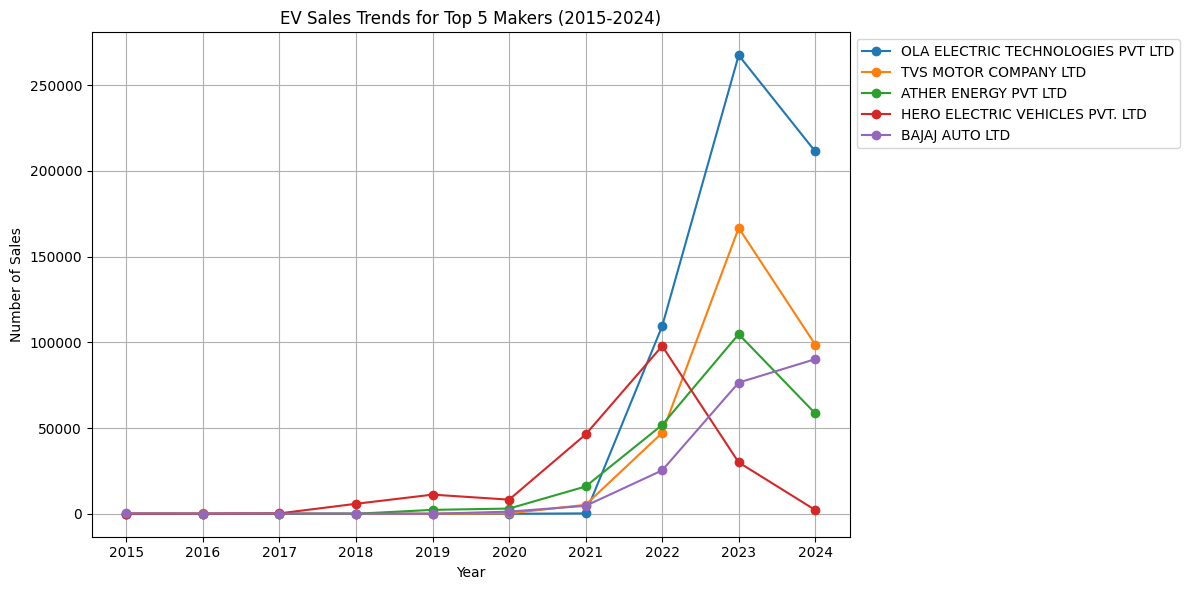

In [37]:
# Consolidate the data by summing sales for makers with duplicate entries
ev_sales_consolidated = ev_sales.groupby(ev_sales.index).sum()

# Re-select the top 5 EV makers based on the consolidated data
top_ev_makers_consolidated = ev_sales_consolidated.sum(axis=1).sort_values(ascending=False).head(5).index
ev_sales_top_makers_consolidated = ev_sales_consolidated.loc[top_ev_makers_consolidated]

# Plot trends for the top 5 EV makers after consolidation
plt.figure(figsize=(12, 6))
for maker in ev_sales_top_makers_consolidated.index:
    plt.plot(ev_sales_top_makers_consolidated.columns, ev_sales_top_makers_consolidated.loc[maker], marker='o', label=maker)

plt.title('EV Sales Trends for Top 5 Makers (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


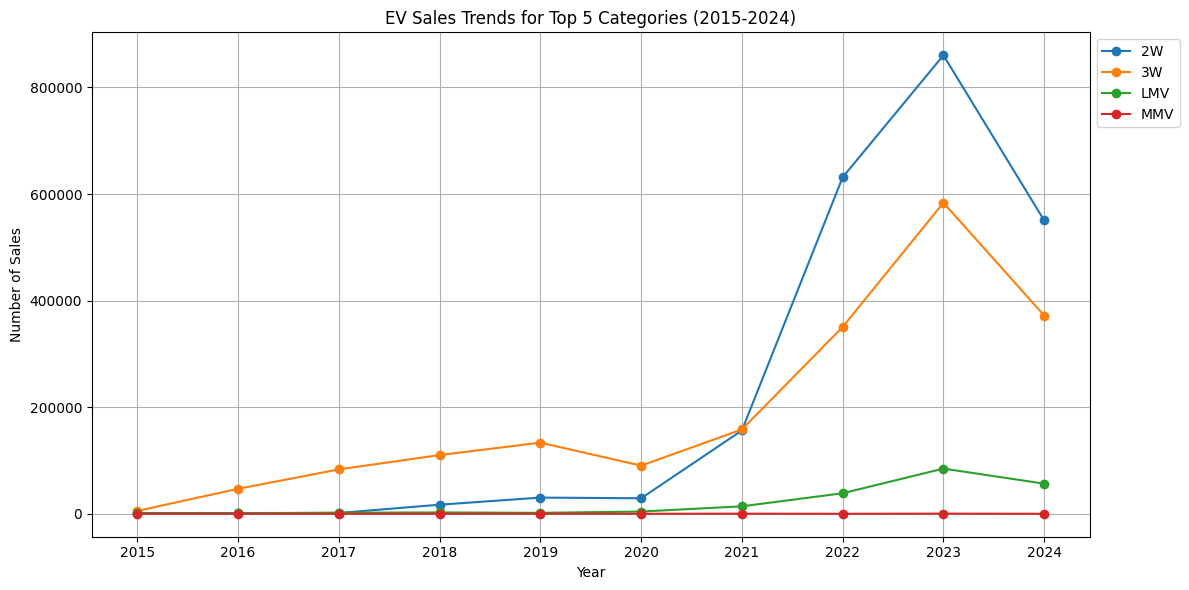

In [38]:
# Select the 'EV Sales by Makers and Category' dataset
ev_sales_cat = dataframes['ev_sales']

# Group by 'Cat' to sum up sales across all makers (remove erroneous drop)
ev_sales_by_category = ev_sales_cat.groupby('Cat').sum(numeric_only=True)

# Identify the top 5 categories by total sales
top_5_categories = ev_sales_by_category.sum(axis=1).sort_values(ascending=False).head(5).index

# Extract data for the top 5 categories
ev_sales_top_categories = ev_sales_by_category.loc[top_5_categories]

# Plot the sales trends for the top 5 categories
plt.figure(figsize=(12, 6))
for category in ev_sales_top_categories.index:
    plt.plot(ev_sales_top_categories.columns, ev_sales_top_categories.loc[category], marker='o', label=category)

plt.title('EV Sales Trends for Top 5 Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


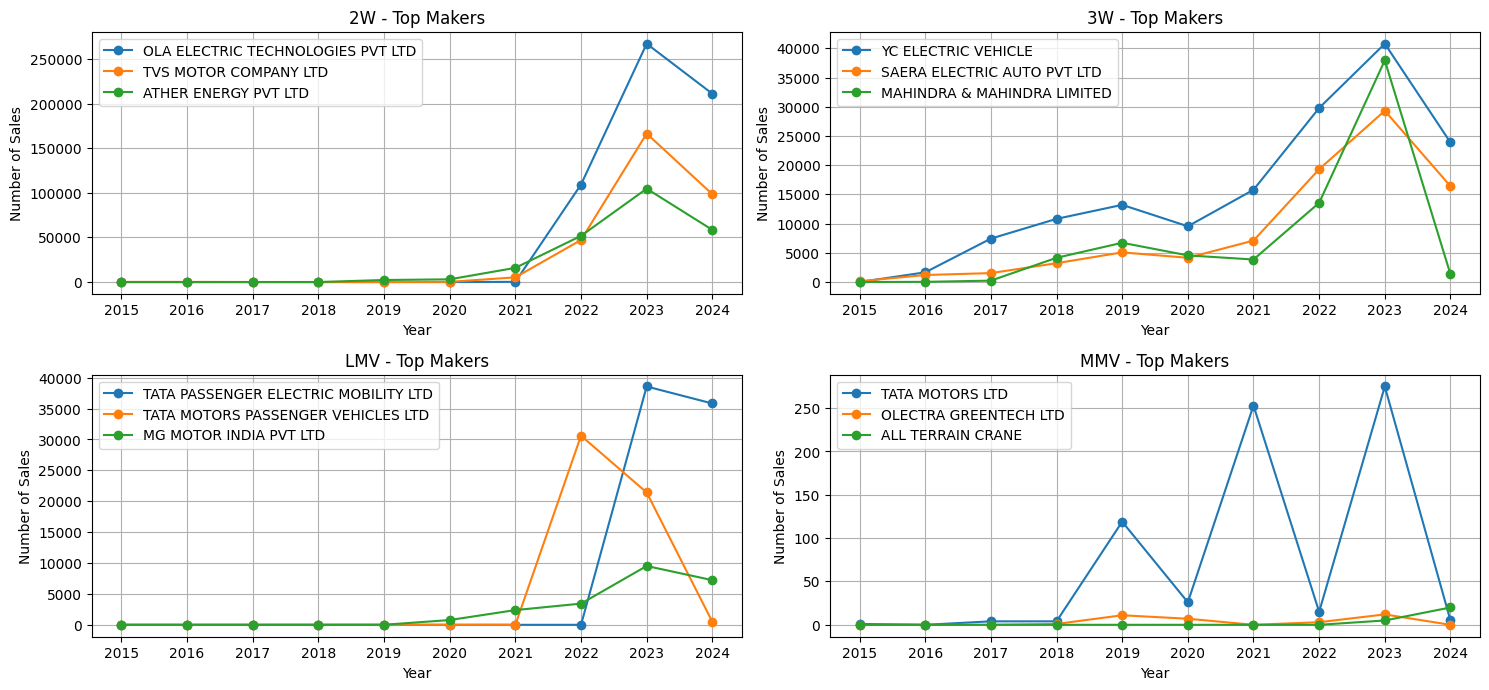

In [39]:
# First, let's identify the top makers within each of the top 5 categories
top_makers_per_category = {}

for category in top_5_categories:
    category_data = ev_sales_cat[ev_sales_cat['Cat'] == category]
    top_makers = category_data.groupby('Maker').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(3).index
    top_makers_per_category[category] = top_makers

# Now, let's plot the sales trends for the top makers within each of these categories
plt.figure(figsize=(15, 10))

for i, (category, makers) in enumerate(top_makers_per_category.items(), 1):
    plt.subplot(3, 2, i)
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        plt.plot(maker_data.columns[2:], maker_data.iloc[0, 2:], marker='o', label=maker)
    plt.title(f'{category} - Top Makers')
    plt.xlabel('Year')
    plt.ylabel('Number of Sales')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


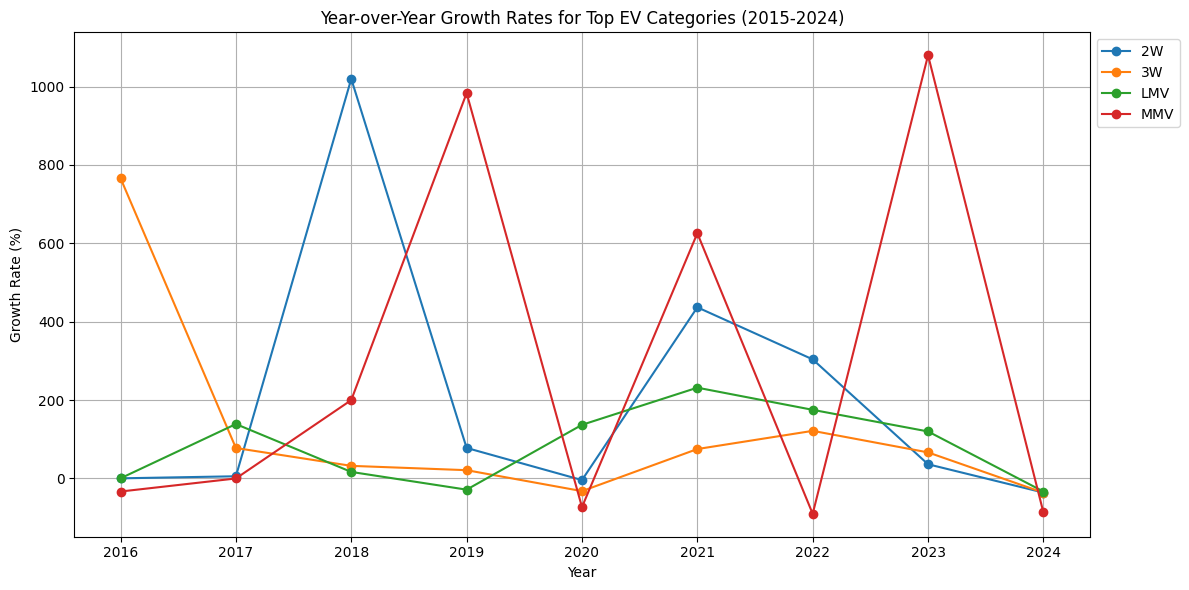

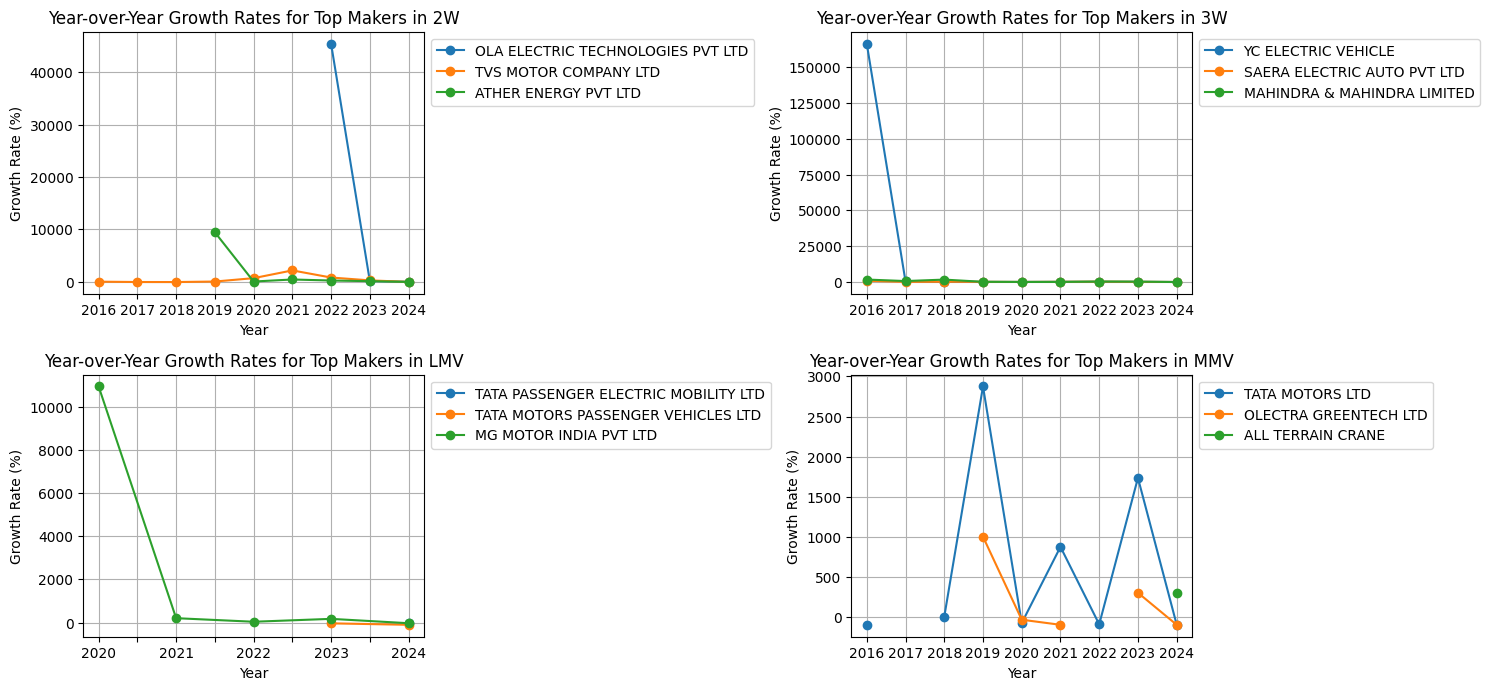

In [40]:
# Calculate year-over-year growth rates for top categories
category_growth_rates = ev_sales_top_categories.pct_change(axis=1) * 100

# Plot growth rates for top categories
plt.figure(figsize=(12, 6))
for category in category_growth_rates.index:
    plt.plot(category_growth_rates.columns, category_growth_rates.loc[category], marker='o', label=category)

plt.title('Year-over-Year Growth Rates for Top EV Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Now calculate year-over-year growth rates for top makers within top categories
maker_growth_rates = {}
for category, makers in top_makers_per_category.items():
    growth_rates = []
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        growth_rate = maker_data.iloc[0, 2:].pct_change() * 100
        growth_rates.append(growth_rate)
    maker_growth_rates[category] = pd.concat(growth_rates, axis=1)
    maker_growth_rates[category].columns = makers

# Plot growth rates for top makers within each category
plt.figure(figsize=(15, 10))

for i, (category, growth_rates) in enumerate(maker_growth_rates.items(), 1):
    plt.subplot(3, 2, i)
    growth_rates.plot(ax=plt.gca(), marker='o')
    plt.title(f'Year-over-Year Growth Rates for Top Makers in {category}')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)

plt.tight_layout()
plt.show()

In [41]:
## Sales Forecast¶ ARIMA Model
# Forecasting the overall EV sales for next 5 years with ARIMA and SARIMA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Valu

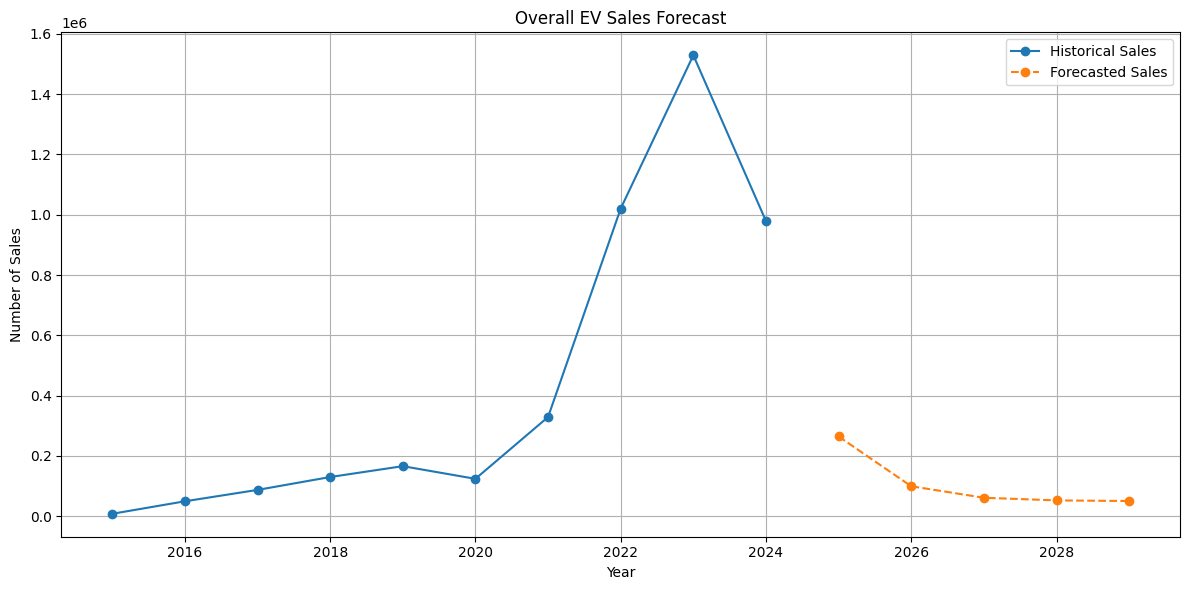

In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Sum up the sales across all categories to get overall sales for each year
overall_sales = ev_sales_by_category.sum()

# Convert the index to integers (years)
overall_sales.index = overall_sales.index.astype(int)

# Fit the ARIMA model again
model = ARIMA(overall_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 5 years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Create a range of future years
future_years = np.arange(overall_sales.index[-1] + 1, overall_sales.index[-1] + 1 + forecast_steps)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(overall_sales.index, overall_sales, marker='o', label='Historical Sales')
plt.plot(future_years, forecast, marker='o', linestyle='--', label='Forecasted Sales')
plt.title('Overall EV Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


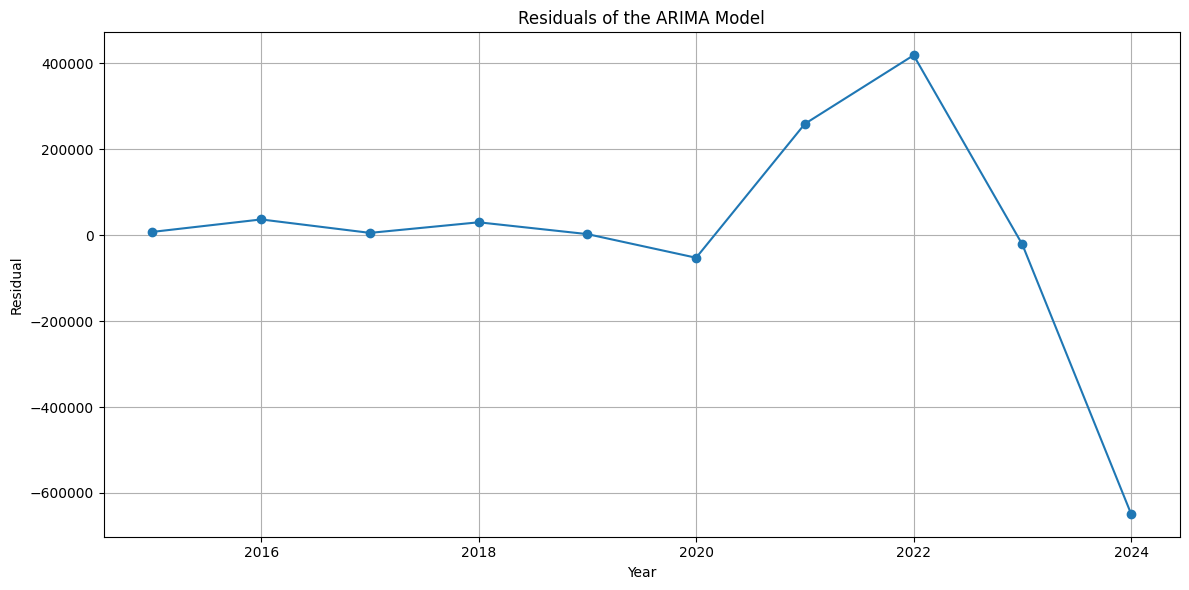

In [43]:
# model evaluation ARIMA Model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate residuals (difference between actual values and predicted values)
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, marker='o')
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: Valu

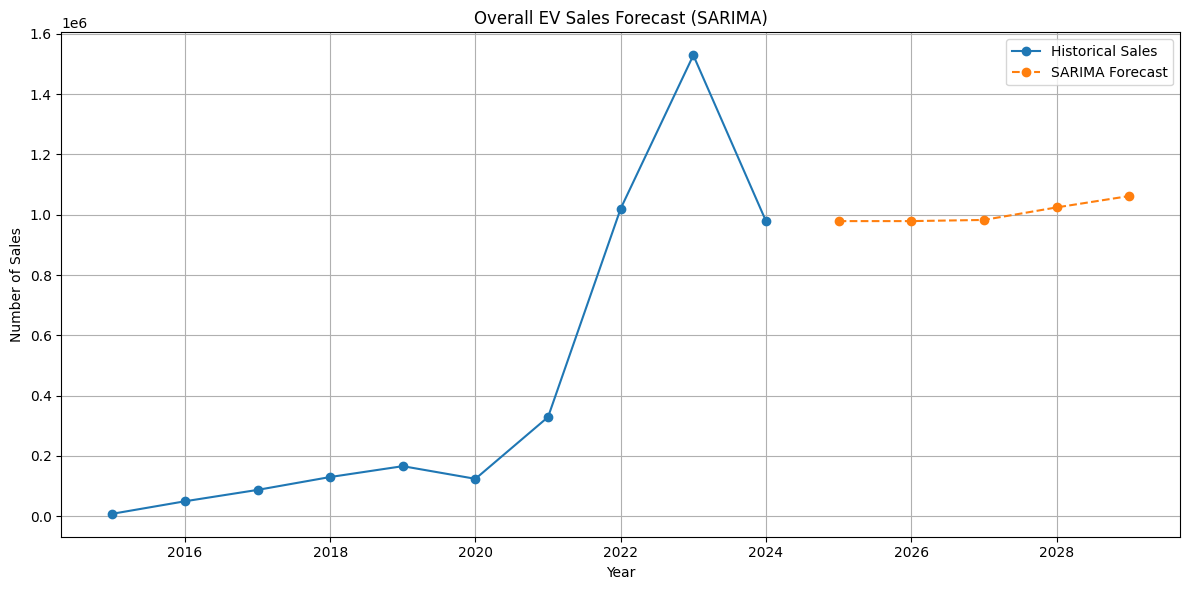

In [44]:
# overall ev sales forcast SARIMA model

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model (order p,d,q) x (P,D,Q,s) where s is the seasonal period
sarima_model = SARIMAX(overall_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast the next 5 years with SARIMA
sarima_forecast = sarima_model_fit.forecast(steps=forecast_steps)

# Plot the historical data and SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(overall_sales.index, overall_sales, marker='o', label='Historical Sales')
plt.plot(future_years, sarima_forecast, marker='o', linestyle='--', label='SARIMA Forecast')
plt.title('Overall EV Sales Forecast (SARIMA)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


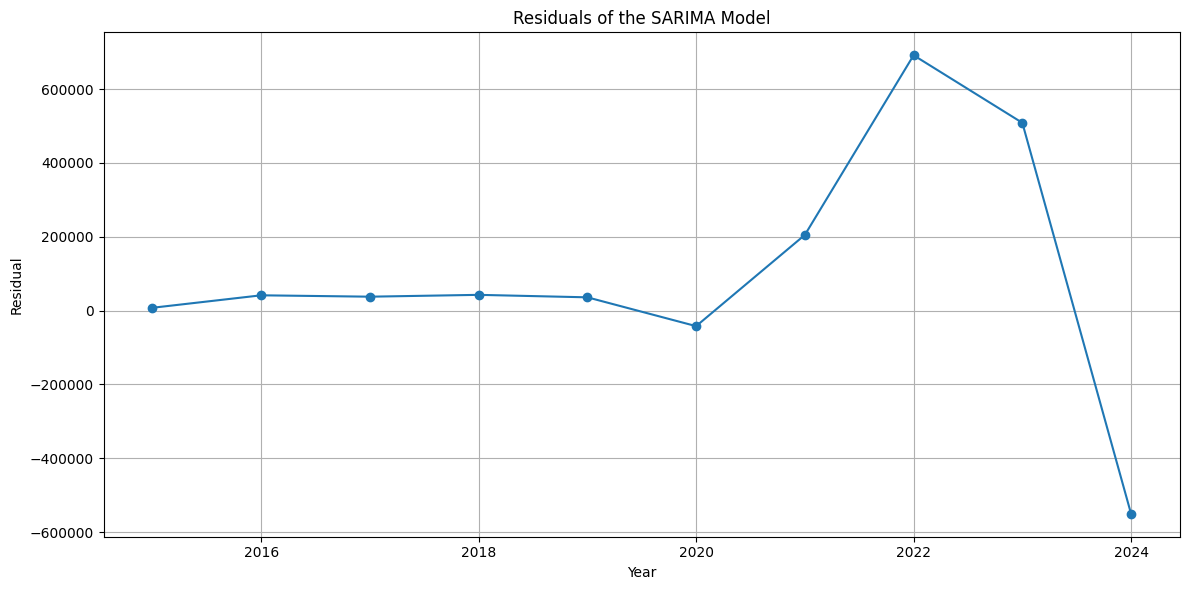

In [45]:
# Residual analysis for SARIMA model
sarima_residuals = sarima_model_fit.resid

# Plot the residuals of SARIMA
plt.figure(figsize=(12, 6))
plt.plot(sarima_residuals, marker='o')
plt.title('Residuals of the SARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.grid(True)
plt.tight_layout()
plt.show()